In [2]:
# import torch
# print(torch.cuda.is_available())
# print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")

## Testing Learning Rate

In [1]:
from sb3_contrib import MaskablePPO
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
import numpy as np
import torch
from environment3 import LifeStyleEnv
import gymnasium as gym
from sb3_contrib.common.wrappers import ActionMasker

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

def mask_fn(env: gym.Env) -> np.ndarray:
    unwrapped_env = env
    while hasattr(unwrapped_env, "env"):
        unwrapped_env = unwrapped_env.env
    return unwrapped_env.action_masks()

def make_env(is_eval: bool = False):
    env = LifeStyleEnv()
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True) 
    return env

env = make_env()
env = ActionMasker(env, mask_fn)

eval_env = make_env(is_eval=True)
eval_env = ActionMasker(eval_env, mask_fn)

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./logs/ppo/ppo_best_model_test1",
    log_path="./logs/ppo/ppo_results_test1",
    eval_freq=5000,
    n_eval_episodes=10,
    deterministic=True,
    render=False
)

model = MaskablePPO(
    "MultiInputPolicy",  
    env,
    learning_rate=0.0005,
    n_steps=512,
    batch_size=128,
    n_epochs=10,
    gamma=0.95,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.001,  
    vf_coef=0.5,
    max_grad_norm=0.5,
    verbose=1,
    device=device,
    policy_kwargs=dict(net_arch=[256, 256]),
    tensorboard_log="./logs/ppo/ppo_tensorboard_test1/"
)

model.learn(
    total_timesteps=80000, 
    callback=eval_callback
)


2025-09-05 22:52:04.763971: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-05 22:52:04.817252: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-05 22:52:05.821599: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Using device: cpu
Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo/ppo_tensorboard_test1/PPO_1
-----------------------------
| time/              |      |
|    fps             | 1934 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 512  |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1603         |
|    iterations           | 2            |
|    time_elapsed         | 0            |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 0.0079423385 |
|    clip_fraction        | 0.105        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.77        |
|    explained_variance   | -0.000998    |
|    learning_rate        | 0.0005       |
|    loss                 | 1.43e+03     |
|    n_updates            | 10           |
|    policy_gradient_loss

In [2]:
from sb3_contrib import MaskablePPO
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
import numpy as np
import torch
from environment3 import LifeStyleEnv
import gymnasium as gym
from sb3_contrib.common.wrappers import ActionMasker

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

def mask_fn(env: gym.Env) -> np.ndarray:
    unwrapped_env = env
    while hasattr(unwrapped_env, "env"):
        unwrapped_env = unwrapped_env.env
    return unwrapped_env.action_masks()

def make_env(is_eval: bool = False):
    env = LifeStyleEnv()
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True) 
    return env

env = make_env()
env = ActionMasker(env, mask_fn)

eval_env = make_env(is_eval=True)
eval_env = ActionMasker(eval_env, mask_fn)

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./logs/ppo/ppo_best_model_test2",
    log_path="./logs/ppo/ppo_results_test2",
    eval_freq=5000,
    n_eval_episodes=10,
    deterministic=True,
    render=False
)

model = MaskablePPO(
    "MultiInputPolicy",  
    env,
    learning_rate=0.001,
    n_steps=512,
    batch_size=128,
    n_epochs=10,
    gamma=0.95,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.001,  
    vf_coef=0.5,
    max_grad_norm=0.5,
    verbose=1,
    device=device,
    policy_kwargs=dict(net_arch=[256, 256]),
    tensorboard_log="./logs/ppo/ppo_tensorboard_test2/"
)

model.learn(
    total_timesteps=80000, 
    callback=eval_callback
)


Using device: cpu
Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo/ppo_tensorboard_test2/PPO_1
-----------------------------
| time/              |      |
|    fps             | 1995 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 512  |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1700         |
|    iterations           | 2            |
|    time_elapsed         | 0            |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 0.0046899924 |
|    clip_fraction        | 0.0785       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.771       |
|    explained_variance   | 0.0019       |
|    learning_rate        | 0.001        |
|    loss                 | 1.47e+03     |
|    n_updates            | 10           |
|    policy_gradient_loss

Contents of logs/ppo/ppo_results_test1/evaluations.npz: ['timesteps', 'results', 'ep_lengths']
Mean reward for LR = 0.0005: -2116.26
Contents of logs/ppo/ppo_results_test2/evaluations.npz: ['timesteps', 'results', 'ep_lengths']
Mean reward for LR = 0.001: -3706.48


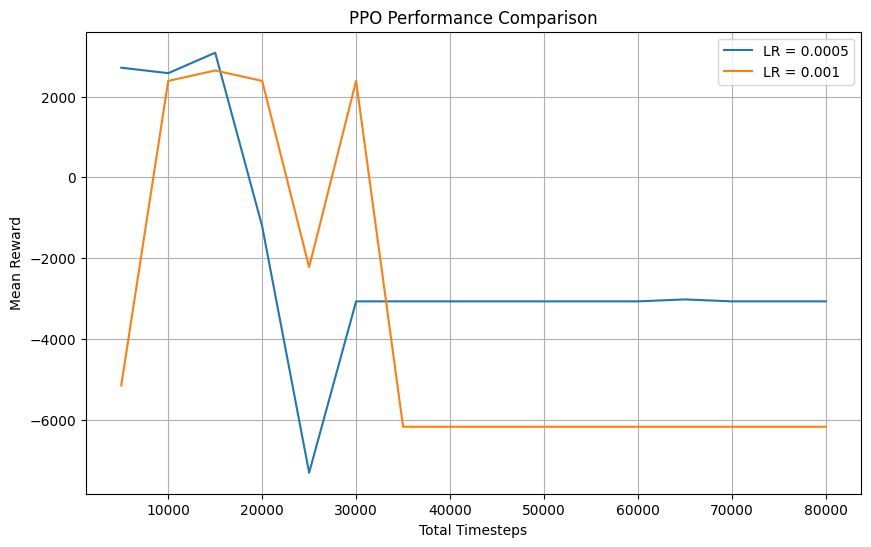

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Two file paths for comparison
file_paths = [
    'logs/ppo/ppo_results_test1/evaluations.npz',
    'logs/ppo/ppo_results_test2/evaluations.npz'
]

labels = ['LR = 0.0005', 'LR = 0.001']  # Labels for the legend

plt.figure(figsize=(10, 6))

for file_path, label in zip(file_paths, labels):
    try:
        data = np.load(file_path)
        print(f"Contents of {file_path}: {data.files}")
        
        timesteps = data['timesteps']
        results = data['results']
        
        mean_reward = np.mean(results)
        print(f"Mean reward for {label}: {mean_reward:.2f}")

        # results might be a 2D array (num_eval, num_envs), take mean if needed
        if results.ndim > 1:
            results = results.mean(axis=1)

        plt.plot(timesteps, results, label=label)

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except KeyError as e:
        print(f"Error: The key {e} was not found in the NPZ file. Check the contents using data.files.")
    except Exception as e:
        print(f"An unexpected error occurred with {file_path}: {e}")

plt.title('PPO Performance Comparison')
plt.xlabel('Total Timesteps')
plt.ylabel('Mean Reward')
plt.legend()
plt.grid(True)
plt.show()

## Testing with different entropy coeffiecient       

In [9]:
from sb3_contrib import MaskablePPO
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
import numpy as np
import torch
from environment3 import LifeStyleEnv
import gymnasium as gym
from sb3_contrib.common.wrappers import ActionMasker

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

def mask_fn(env: gym.Env) -> np.ndarray:
    unwrapped_env = env
    while hasattr(unwrapped_env, "env"):
        unwrapped_env = unwrapped_env.env
    return unwrapped_env.action_masks()

def make_env(is_eval: bool = False):
    env = LifeStyleEnv()
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True) 
    return env

env = make_env()
env = ActionMasker(env, mask_fn)

eval_env = make_env(is_eval=True)
eval_env = ActionMasker(eval_env, mask_fn)

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./logs/ppo/ppo_best_model_test3",
    log_path="./logs/ppo/ppo_results_test3",
    eval_freq=5000,
    n_eval_episodes=10,
    deterministic=True,
    render=False
)

model = MaskablePPO(
    "MultiInputPolicy",  
    env,
    learning_rate=0.001,
    n_steps=512,
    batch_size=128,
    n_epochs=10,
    gamma=0.95,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.001,  
    vf_coef=0.5,
    max_grad_norm=0.5,
    verbose=1,
    device=device,
    policy_kwargs=dict(net_arch=[256, 256]),
    tensorboard_log="./logs/ppo/ppo_tensorboard_test3/"
)

model.learn(
    total_timesteps=80000, 
    callback=eval_callback
)


Using device: cpu
Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo/ppo_tensorboard_test3/PPO_2
-----------------------------
| time/              |      |
|    fps             | 1769 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 512  |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1576        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 1024        |
| train/                  |             |
|    approx_kl            | 0.007898542 |
|    clip_fraction        | 0.118       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.768      |
|    explained_variance   | -0.00214    |
|    learning_rate        | 0.001       |
|    loss                 | 1.61e+03    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0223     

In [7]:
from sb3_contrib import MaskablePPO
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
import numpy as np
import torch
from environment3 import LifeStyleEnv
import gymnasium as gym
from sb3_contrib.common.wrappers import ActionMasker

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

def mask_fn(env: gym.Env) -> np.ndarray:
    unwrapped_env = env
    while hasattr(unwrapped_env, "env"):
        unwrapped_env = unwrapped_env.env
    return unwrapped_env.action_masks()

def make_env(is_eval: bool = False):
    env = LifeStyleEnv()
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True) 
    return env

env = make_env()
env = ActionMasker(env, mask_fn)

eval_env = make_env(is_eval=True)
eval_env = ActionMasker(eval_env, mask_fn)

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./logs/ppo/ppo_best_model_test4",
    log_path="./logs/ppo/ppo_results_test4",
    eval_freq=5000,
    n_eval_episodes=10,
    deterministic=True,
    render=False
)

model = MaskablePPO(
    "MultiInputPolicy",  
    env,
    learning_rate=0.001,
    n_steps=512,
    batch_size=128,
    n_epochs=10,
    gamma=0.95,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0,  
    vf_coef=0.5,
    max_grad_norm=0.5,
    verbose=1,
    device=device,
    policy_kwargs=dict(net_arch=[256, 256]),
    tensorboard_log="./logs/ppo/ppo_tensorboard_test4/"
)

model.learn(
    total_timesteps=80000, 
    callback=eval_callback
)


Using device: cpu
Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo/ppo_tensorboard_test4/PPO_2
-----------------------------
| time/              |      |
|    fps             | 1979 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 512  |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1654        |
|    iterations           | 2           |
|    time_elapsed         | 0           |
|    total_timesteps      | 1024        |
| train/                  |             |
|    approx_kl            | 0.006879541 |
|    clip_fraction        | 0.125       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.768      |
|    explained_variance   | 0.000438    |
|    learning_rate        | 0.001       |
|    loss                 | 2.09e+03    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0209     

Contents of logs/ppo/ppo_results_test3/evaluations.npz: ['timesteps', 'results', 'ep_lengths']
Mean reward for Ent Coef=0.001: 2198.57
Contents of logs/ppo/ppo_results_test4/evaluations.npz: ['timesteps', 'results', 'ep_lengths']
Mean reward for Ent Coef=0: 1687.56


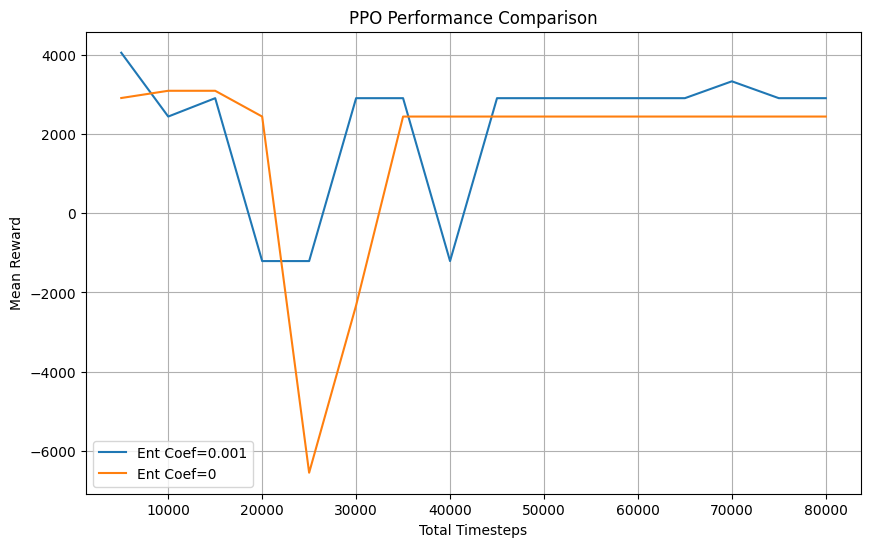

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Two file paths for comparison
file_paths = [
    'logs/ppo/ppo_results_test3/evaluations.npz',
    'logs/ppo/ppo_results_test4/evaluations.npz'
]

labels = ['Ent Coef=0.001', 'Ent Coef=0']  # Labels for the legend

plt.figure(figsize=(10, 6))

for file_path, label in zip(file_paths, labels):
    try:
        data = np.load(file_path)
        print(f"Contents of {file_path}: {data.files}")
        
        timesteps = data['timesteps']
        results = data['results']
        
        mean_reward = np.mean(results)
        print(f"Mean reward for {label}: {mean_reward:.2f}")

        # results might be a 2D array (num_eval, num_envs), take mean if needed
        if results.ndim > 1:
            results = results.mean(axis=1)

        plt.plot(timesteps, results, label=label)

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except KeyError as e:
        print(f"Error: The key {e} was not found in the NPZ file. Check the contents using data.files.")
    except Exception as e:
        print(f"An unexpected error occurred with {file_path}: {e}")

plt.title('PPO Performance Comparison')
plt.xlabel('Total Timesteps')
plt.ylabel('Mean Reward')
plt.legend()
plt.grid(True)
plt.show()

## Training

In [ ]:
from sb3_contrib import MaskablePPO
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
import numpy as np
import torch
from environment3 import LifeStyleEnv
import gymnasium as gym
from sb3_contrib.common.wrappers import ActionMasker

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

def mask_fn(env: gym.Env) -> np.ndarray:
    unwrapped_env = env
    while hasattr(unwrapped_env, "env"):
        unwrapped_env = unwrapped_env.env
    return unwrapped_env.action_masks()

def make_env(is_eval: bool = False):
    env = LifeStyleEnv()
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True) 
    return env

env = make_env()
env = ActionMasker(env, mask_fn)

eval_env = make_env(is_eval=True)
eval_env = ActionMasker(eval_env, mask_fn)

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./logs/ppo/ppo_best_model",
    log_path="./logs/ppo/ppo_results",
    eval_freq=5000,
    n_eval_episodes=10,
    deterministic=True,
    render=False
)

model = MaskablePPO(
    "MultiInputPolicy",  
    env,
    learning_rate=0.0005,
    n_steps=512,
    batch_size=128,
    n_epochs=10,
    gamma=0.95,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.001,  
    vf_coef=0.5,
    max_grad_norm=0.5,
    verbose=1,
    device=device,
    policy_kwargs=dict(net_arch=[256, 256]),
    tensorboard_log="./logs/ppo/ppo_tensorboard/"
)

model.learn(
    total_timesteps=800000, 
    callback=eval_callback
)


Using device: cuda
Using cuda device
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo/ppo_tensorboard/PPO_1
----------------------------
| time/              |     |
|    fps             | 587 |
|    iterations      | 1   |
|    time_elapsed    | 0   |
|    total_timesteps | 512 |
----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 520         |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 1024        |
| train/                  |             |
|    approx_kl            | 0.006931583 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.77       |
|    explained_variance   | 6.79e-06    |
|    learning_rate        | 0.0005      |
|    loss                 | 1.21e+03    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0199     |
|    valu

In [ ]:
from environment3 import LifeStyleEnv
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from sb3_contrib.common.maskable.utils import get_action_masks
import numpy as np
from sb3_contrib import MaskablePPO

def make_env(is_eval: bool = False):
    env = LifeStyleEnv(days_per_episode = 365)
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True)
    return env

eval_env = make_env(is_eval=True)

model = MaskablePPO.load("logs/ppo/ppo_best_model/best_model.zip")

print("Starting Final Evaluation...")
print("-------------------------------------------------------------------------------------------------------------------------------------")
print(f"| {'Day':<3} | {'Timeslot':<10} | {'Action':<10} | {'Event':<10} | {'BMI':<8} | {'Stress':<8} | {'Energy':<8} | {'Hunger':<8} | {'Cal. Intake':<12} | {'Cal. Burned':<12} | {'Reward':<8} |")
print("-------------------------------------------------------------------------------------------------------------------------------------")

episode_rewards = []
for episode in range(1):  
    obs, info = eval_env.reset()
    unwrapped_env = eval_env.unwrapped
    
    done = False
    total_reward = 0
    while not done:
        action_masks = get_action_masks(unwrapped_env)
        action, _ = model.predict(obs, deterministic=True, action_masks=action_masks)
        obs, reward, terminated, truncated, info = eval_env.step(action)
        done = terminated or truncated
        total_reward += reward
        
        timeslot_applied = unwrapped_env.state['current_timeslot'] - 1
        timeslot_applied = max(timeslot_applied, 0)  
        event_applied = unwrapped_env.daily_schedule[timeslot_applied]

        print(
            f"| {unwrapped_env.state['day_of_episode']:<3} | "
            f"{unwrapped_env.state['current_timeslot']:<10} | "
            f"{action:<10} | "
            f"{event_applied:<10} | "
            f"{unwrapped_env.state['current_bmi']:<8.2f} | "
            f"{unwrapped_env.state['current_stress_level']:<8.2f} | "
            f"{unwrapped_env.state['current_energy_level']:<8.2f} | "
            f"{unwrapped_env.state['current_hunger_level']:<8.2f} | "
            f"{unwrapped_env.state['daily_calories_intake']:<12.2f} | "
            f"{unwrapped_env.state['daily_calories_burned']:<12.2f} | "
            f"{reward:<8.2f} |"
        )
        
        episode_rewards.append(reward)

print("-------------------------------------------------------------------------------------------------------------------------------------")
print("Mean evaluation reward:", np.mean(episode_rewards))
print("Std deviation:", np.std(episode_rewards))

Starting Final Evaluation...
-------------------------------------------------------------------------------------------------------------------------------------
| Day | Timeslot   | Action     | Event      | BMI      | Stress   | Energy   | Hunger   | Cal. Intake  | Cal. Burned  | Reward   |
-------------------------------------------------------------------------------------------------------------------------------------
| 0   | 1          | 8          | sleep      | 24.22    | 46.00    | 54.00    | 48.00    | 0.00         | 66.15        | 1.11     |
| 0   | 2          | 8          | sleep      | 24.22    | 42.00    | 58.00    | 46.00    | 0.00         | 132.30       | 2.41     |
| 0   | 3          | 8          | sleep      | 24.22    | 38.00    | 62.00    | 44.00    | 0.00         | 198.45       | 3.69     |
| 0   | 4          | 8          | sleep      | 24.22    | 34.00    | 66.00    | 42.00    | 0.00         | 264.60       | 4.95     |
| 0   | 5          | 8          | sleep    

Contents of the NPZ file: ['timesteps', 'results', 'ep_lengths']
Mean reward: 6218.96


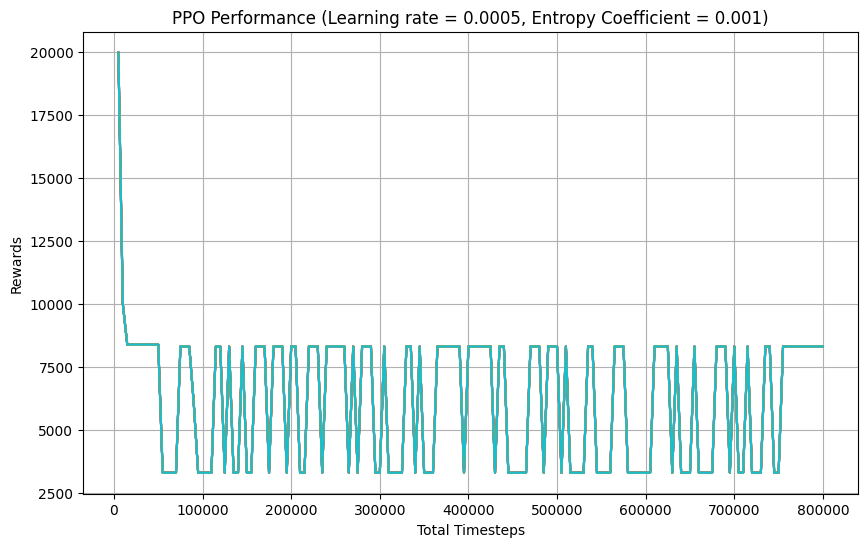

In [3]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'logs/ppo/ppo_results/evaluations.npz'

try:
    data = np.load(file_path)
    print(f"Contents of the NPZ file: {data.files}")
    timesteps = data['timesteps']
    results = data['results']

    mean_reward = np.mean(results)
    print(f"Mean reward: {mean_reward:.2f}")

    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, results)

    plt.title('PPO Performance (Learning rate = 0.0005, Entropy Coefficient = 0.001)')
    plt.xlabel('Total Timesteps')
    plt.ylabel('Rewards')
    plt.grid(True)

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except KeyError as e:
    print(f"Error: The key {e} was not found in the NPZ file. Check the contents using data.files.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

tensorboard --logdir ./logs/ppo/ppo_tensorboard/

In [1]:
from sb3_contrib import MaskablePPO
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
import numpy as np
import torch
from environment3 import LifeStyleEnv
import gymnasium as gym
from sb3_contrib.common.wrappers import ActionMasker

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

def mask_fn(env: gym.Env) -> np.ndarray:
    unwrapped_env = env
    while hasattr(unwrapped_env, "env"):
        unwrapped_env = unwrapped_env.env
    return unwrapped_env.action_masks()

def make_env(is_eval: bool = False):
    env = LifeStyleEnv(initial_weight_kg=45)
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True) 
    return env

env = make_env()
env = ActionMasker(env, mask_fn)

eval_env = make_env(is_eval=True)
eval_env = ActionMasker(eval_env, mask_fn)

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./logs/ppo/ppo_best_model_fined_tuned",
    log_path="./logs/ppo/ppo_results_fined_tuned",
    eval_freq=5000,
    n_eval_episodes=10,
    deterministic=True,
    render=False
)

model = MaskablePPO.load("logs/ppo/ppo_best_model/best_model.zip", env=env)

model.learn(
    total_timesteps=150000, 
    callback=eval_callback
)


2025-09-03 20:46:31.167879: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-03 20:46:31.199426: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-03 20:46:32.164024: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Gym has been unmaintained since 2022 and does not support NumPy 2.0 

Using device: cuda
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo/ppo_tensorboard/PPO_2
----------------------------
| time/              |     |
|    fps             | 508 |
|    iterations      | 1   |
|    time_elapsed    | 1   |
|    total_timesteps | 512 |
----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 507         |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 1024        |
| train/                  |             |
|    approx_kl            | 0.023911985 |
|    clip_fraction        | 0.203       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.606      |
|    explained_variance   | -0.000165   |
|    learning_rate        | 0.0005      |
|    loss                 | 1.42e+03    |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0227     |
|    value_loss           |

Contents of the NPZ file: ['timesteps', 'results', 'ep_lengths']


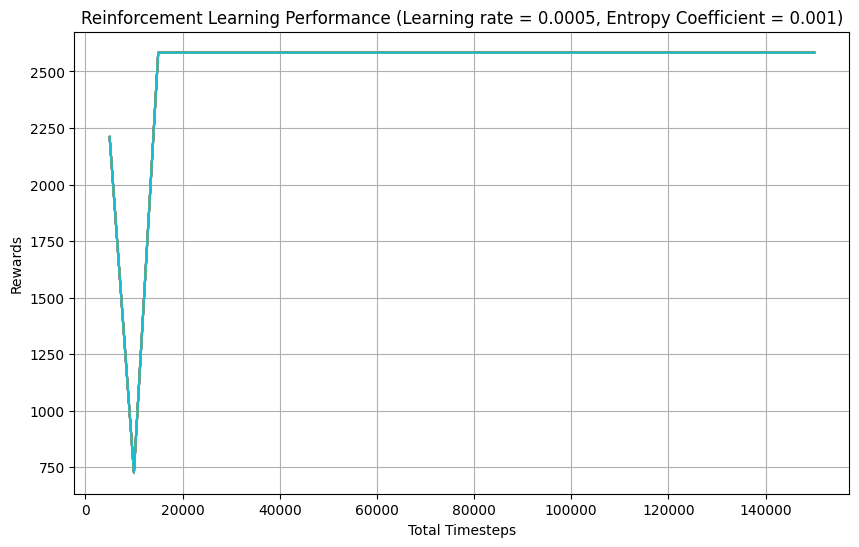

In [14]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'logs/ppo/ppo_results_fined_tuned/evaluations.npz'

try:
    data = np.load(file_path)
    print(f"Contents of the NPZ file: {data.files}")
    timesteps = data['timesteps']
    results = data['results']

    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, results)

    plt.title('Reinforcement Learning Performance (Learning rate = 0.0005, Entropy Coefficient = 0.001)')
    plt.xlabel('Total Timesteps')
    plt.ylabel('Rewards')
    plt.grid(True)

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except KeyError as e:
    print(f"Error: The key {e} was not found in the NPZ file. Check the contents using data.files.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [4]:
from environment3 import LifeStyleEnv
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from sb3_contrib.common.maskable.utils import get_action_masks
import numpy as np
from sb3_contrib import MaskablePPO

def make_env(is_eval: bool = False):
    env = LifeStyleEnv(days_per_episode = 365, initial_weight_kg=45)
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True)
    return env

eval_env = make_env(is_eval=True)

model = MaskablePPO.load("logs/ppo/ppo_best_model_fined_tuned/best_model.zip")

print("Starting Final Evaluation...")
print("-------------------------------------------------------------------------------------------------------------------------------------")
print(f"| {'Day':<3} | {'Timeslot':<10} | {'Action':<10} | {'Event':<10} | {'BMI':<8} | {'Stress':<8} | {'Energy':<8} | {'Hunger':<8} | {'Cal. Intake':<12} | {'Cal. Burned':<12} | {'Reward':<8} |")
print("-------------------------------------------------------------------------------------------------------------------------------------")

episode_rewards = []
for episode in range(1):  
    obs, info = eval_env.reset()
    unwrapped_env = eval_env.unwrapped
    
    done = False
    total_reward = 0
    while not done:
        action_masks = get_action_masks(unwrapped_env)
        action, _ = model.predict(obs, deterministic=True, action_masks=action_masks)
        obs, reward, terminated, truncated, info = eval_env.step(action)
        done = terminated or truncated
        total_reward += reward
        
        timeslot_applied = unwrapped_env.state['current_timeslot'] - 1
        timeslot_applied = max(timeslot_applied, 0)  
        event_applied = unwrapped_env.daily_schedule[timeslot_applied]

        print(
            f"| {unwrapped_env.state['day_of_episode']:<3} | "
            f"{unwrapped_env.state['current_timeslot']:<10} | "
            f"{action:<10} | "
            f"{event_applied:<10} | "
            f"{unwrapped_env.state['current_bmi']:<8.2f} | "
            f"{unwrapped_env.state['current_stress_level']:<8.2f} | "
            f"{unwrapped_env.state['current_energy_level']:<8.2f} | "
            f"{unwrapped_env.state['current_hunger_level']:<8.2f} | "
            f"{unwrapped_env.state['daily_calories_intake']:<12.2f} | "
            f"{unwrapped_env.state['daily_calories_burned']:<12.2f} | "
            f"{reward:<8.2f} |"
        )
        
        episode_rewards.append(reward)

print("-------------------------------------------------------------------------------------------------------------------------------------")
print("Mean evaluation reward:", np.mean(episode_rewards))
print("Std deviation:", np.std(episode_rewards))

Starting Final Evaluation...
-------------------------------------------------------------------------------------------------------------------------------------
| Day | Timeslot   | Action     | Event      | BMI      | Stress   | Energy   | Hunger   | Cal. Intake  | Cal. Burned  | Reward   |
-------------------------------------------------------------------------------------------------------------------------------------
| 0   | 1          | 8          | sleep      | 15.57    | 46.00    | 54.00    | 48.00    | 0.00         | 42.52        | 0.62     |
| 0   | 2          | 8          | sleep      | 15.57    | 42.00    | 58.00    | 46.00    | 0.00         | 85.05        | 1.43     |
| 0   | 3          | 8          | sleep      | 15.57    | 38.00    | 62.00    | 44.00    | 0.00         | 127.57       | 2.23     |
| 0   | 4          | 8          | sleep      | 15.57    | 34.00    | 66.00    | 42.00    | 0.00         | 170.10       | 2.99     |
| 0   | 5          | 8          | sleep    

In [1]:
from sb3_contrib import MaskablePPO
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
import numpy as np
import torch
from environment3 import LifeStyleEnv
import gymnasium as gym
from sb3_contrib.common.wrappers import ActionMasker

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

def mask_fn(env: gym.Env) -> np.ndarray:
    unwrapped_env = env
    while hasattr(unwrapped_env, "env"):
        unwrapped_env = unwrapped_env.env
    return unwrapped_env.action_masks()

def make_env(is_eval: bool = False):
    env = LifeStyleEnv(initial_weight_kg=85)
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True) 
    return env

env = make_env()
env = ActionMasker(env, mask_fn)

eval_env = make_env(is_eval=True)
eval_env = ActionMasker(eval_env, mask_fn)

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./logs/ppo/ppo_best_model_fined_tuned2",
    log_path="./logs/ppo/ppo_results_fined_tuned2",
    eval_freq=5000,
    n_eval_episodes=10,
    deterministic=True,
    render=False
)

model = MaskablePPO.load("logs/ppo/ppo_best_model_fined_tuned/best_model.zip", 
                         env=env, 
                         custom_objects=dict(
                             learning_rate=0.001,
                             buffer_size=500000))

model.learn(
    total_timesteps=150000, 
    callback=eval_callback,
    reset_num_timesteps=False
)


2025-09-03 21:05:03.203280: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-03 21:05:03.234433: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-03 21:05:04.179319: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Gym has been unmaintained since 2022 and does not support NumPy 2.0 

Using device: cuda
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo/ppo_tensorboard/PPO_3
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 581      |
|    ep_rew_mean     | 9.34e+03 |
| time/              |          |
|    fps             | 498      |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 20512    |
---------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 584           |
|    ep_rew_mean          | 8.68e+03      |
| time/                   |               |
|    fps                  | 499           |
|    iterations           | 2             |
|    time_elapsed         | 2             |
|    total_timesteps      | 21024         |
| train/                  |               |
|    approx_kl            | 2.8263412e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2   

In [17]:
from environment3 import LifeStyleEnv
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from sb3_contrib.common.maskable.utils import get_action_masks
import numpy as np
from sb3_contrib import MaskablePPO

def make_env(is_eval: bool = False):
    env = LifeStyleEnv(days_per_episode = 365, initial_weight_kg=45)
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True)
    return env

eval_env = make_env(is_eval=True)

model = MaskablePPO.load("logs/ppo/ppo_best_model_fined_tuned/best_model.zip")

print("Starting Final Evaluation...")
print("-------------------------------------------------------------------------------------------------------------------------------------")
print(f"| {'Day':<3} | {'Timeslot':<10} | {'Action':<10} | {'Event':<10} | {'BMI':<8} | {'Stress':<8} | {'Energy':<8} | {'Hunger':<8} | {'Cal. Intake':<12} | {'Cal. Burned':<12} | {'Reward':<8} |")
print("-------------------------------------------------------------------------------------------------------------------------------------")

episode_rewards = []
for episode in range(1):  
    obs, info = eval_env.reset()
    unwrapped_env = eval_env.unwrapped
    
    done = False
    total_reward = 0
    while not done:
        action_masks = get_action_masks(unwrapped_env)
        action, _ = model.predict(obs, deterministic=True, action_masks=action_masks)
        obs, reward, terminated, truncated, info = eval_env.step(action)
        done = terminated or truncated
        total_reward += reward
        
        timeslot_applied = unwrapped_env.state['current_timeslot'] - 1
        timeslot_applied = max(timeslot_applied, 0)  
        event_applied = unwrapped_env.daily_schedule[timeslot_applied]

        print(
            f"| {unwrapped_env.state['day_of_episode']:<3} | "
            f"{unwrapped_env.state['current_timeslot']:<10} | "
            f"{action:<10} | "
            f"{event_applied:<10} | "
            f"{unwrapped_env.state['current_bmi']:<8.2f} | "
            f"{unwrapped_env.state['current_stress_level']:<8.2f} | "
            f"{unwrapped_env.state['current_energy_level']:<8.2f} | "
            f"{unwrapped_env.state['current_hunger_level']:<8.2f} | "
            f"{unwrapped_env.state['daily_calories_intake']:<12.2f} | "
            f"{unwrapped_env.state['daily_calories_burned']:<12.2f} | "
            f"{reward:<8.2f} |"
        )
        
        episode_rewards.append(reward)

print("-------------------------------------------------------------------------------------------------------------------------------------")
print("Mean evaluation reward:", np.mean(episode_rewards))
print("Std deviation:", np.std(episode_rewards))

Starting Final Evaluation...
-------------------------------------------------------------------------------------------------------------------------------------
| Day | Timeslot   | Action     | Event      | BMI      | Stress   | Energy   | Hunger   | Cal. Intake  | Cal. Burned  | Reward   |
-------------------------------------------------------------------------------------------------------------------------------------
| 0   | 1          | 8          | sleep      | 15.57    | 46.00    | 54.00    | 48.00    | 0.00         | 42.52        | 0.62     |
| 0   | 2          | 8          | sleep      | 15.57    | 42.00    | 58.00    | 46.00    | 0.00         | 85.05        | 1.43     |
| 0   | 3          | 8          | sleep      | 15.57    | 38.00    | 62.00    | 44.00    | 0.00         | 127.57       | 2.23     |
| 0   | 4          | 8          | sleep      | 15.57    | 34.00    | 66.00    | 42.00    | 0.00         | 170.10       | 2.99     |
| 0   | 5          | 8          | sleep    

Contents of the NPZ file: ['timesteps', 'results', 'ep_lengths']


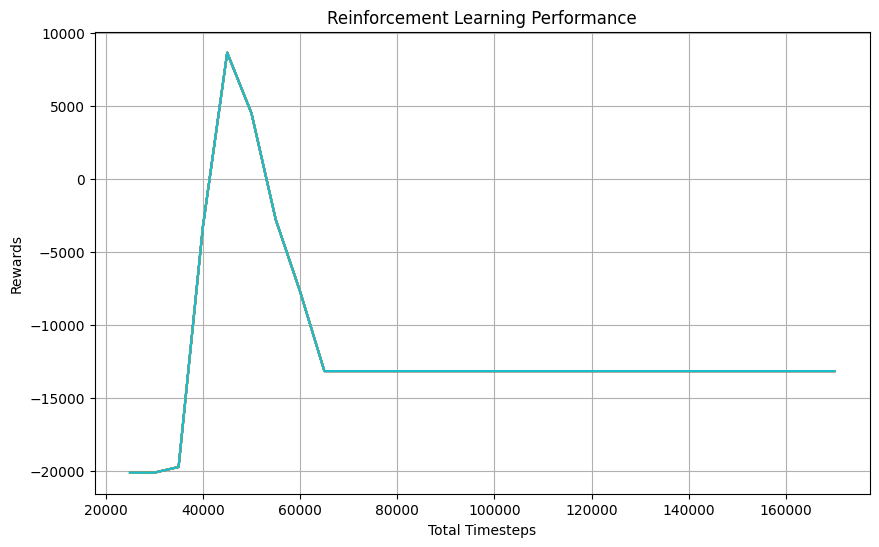

In [13]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'logs/ppo/ppo_results_fined_tuned2/evaluations.npz'

try:
    data = np.load(file_path)
    print(f"Contents of the NPZ file: {data.files}")
    timesteps = data['timesteps']
    results = data['results']

    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, results)

    plt.title('Reinforcement Learning Performance')
    plt.xlabel('Total Timesteps')
    plt.ylabel('Rewards')
    plt.grid(True)

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except KeyError as e:
    print(f"Error: The key {e} was not found in the NPZ file. Check the contents using data.files.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

tensorboard --logdir logs/ppo/ppo_tensorboard

## Best Model is ppo_best_model2

In [19]:
from sb3_contrib import MaskablePPO
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
import numpy as np
import torch
from environment3 import LifeStyleEnv
import gymnasium as gym
from sb3_contrib.common.wrappers import ActionMasker

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

def mask_fn(env: gym.Env) -> np.ndarray:
    unwrapped_env = env
    while hasattr(unwrapped_env, "env"):
        unwrapped_env = unwrapped_env.env
    return unwrapped_env.action_masks()

def make_env(is_eval: bool = False):
    env = LifeStyleEnv()
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True) 
    return env

env = make_env()
env = ActionMasker(env, mask_fn)

eval_env = make_env(is_eval=True)
eval_env = ActionMasker(eval_env, mask_fn)

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./logs/ppo/ppo_best_model1",
    log_path="./logs/ppo/ppo_results1",
    eval_freq=5000,
    n_eval_episodes=10,
    deterministic=True,
    render=False
)

model = MaskablePPO(
    "MultiInputPolicy",  
    env,
    learning_rate=0.0005,
    n_steps=512,
    batch_size=128,
    n_epochs=10,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.001,  
    vf_coef=0.5,
    max_grad_norm=0.5,
    verbose=1,
    device=device,
    policy_kwargs=dict(net_arch=[256, 256]),
    tensorboard_log="./logs/ppo/ppo_tensorboard1/"
)

model.learn(
    total_timesteps=100000, 
    callback=eval_callback
)

Using device: cpu
Using cpu device
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo/ppo_tensorboard1/PPO_1
-----------------------------
| time/              |      |
|    fps             | 1866 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 512  |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1587         |
|    iterations           | 2            |
|    time_elapsed         | 0            |
|    total_timesteps      | 1024         |
| train/                  |              |
|    approx_kl            | 0.0045631807 |
|    clip_fraction        | 0.0566       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.773       |
|    explained_variance   | -0.00776     |
|    learning_rate        | 0.0005       |
|    loss                 | 3.66e+03     |
|    n_updates            | 10           |
|    policy_gradient_loss | -0

In [21]:
from environment3 import LifeStyleEnv
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from sb3_contrib.common.maskable.utils import get_action_masks
import numpy as np
from sb3_contrib import MaskablePPO

def make_env(is_eval: bool = False):
    env = LifeStyleEnv(days_per_episode = 365, initial_weight_kg=85)
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True)
    return env

eval_env = make_env(is_eval=True)

model = MaskablePPO.load("logs/ppo/ppo_best_model1/best_model.zip")

print("Starting Final Evaluation...")
print("-------------------------------------------------------------------------------------------------------------------------------------")
print(f"| {'Day':<3} | {'Timeslot':<10} | {'Action':<10} | {'Event':<10} | {'BMI':<8} | {'Stress':<8} | {'Energy':<8} | {'Hunger':<8} | {'Cal. Intake':<12} | {'Cal. Burned':<12} | {'Reward':<8} |")
print("-------------------------------------------------------------------------------------------------------------------------------------")

episode_rewards = []
for episode in range(1):  
    obs, info = eval_env.reset()
    unwrapped_env = eval_env.unwrapped
    
    done = False
    total_reward = 0
    while not done:
        action_masks = get_action_masks(unwrapped_env)
        action, _ = model.predict(obs, deterministic=True, action_masks=action_masks)
        obs, reward, terminated, truncated, info = eval_env.step(action)
        done = terminated or truncated
        total_reward += reward
        
        timeslot_applied = unwrapped_env.state['current_timeslot'] - 1
        timeslot_applied = max(timeslot_applied, 0)  
        event_applied = unwrapped_env.daily_schedule[timeslot_applied]

        print(
            f"| {unwrapped_env.state['day_of_episode']:<3} | "
            f"{unwrapped_env.state['current_timeslot']:<10} | "
            f"{action:<10} | "
            f"{event_applied:<10} | "
            f"{unwrapped_env.state['current_bmi']:<8.2f} | "
            f"{unwrapped_env.state['current_stress_level']:<8.2f} | "
            f"{unwrapped_env.state['current_energy_level']:<8.2f} | "
            f"{unwrapped_env.state['current_hunger_level']:<8.2f} | "
            f"{unwrapped_env.state['daily_calories_intake']:<12.2f} | "
            f"{unwrapped_env.state['daily_calories_burned']:<12.2f} | "
            f"{reward:<8.2f} |"
        )
        
        episode_rewards.append(reward)

print("-------------------------------------------------------------------------------------------------------------------------------------")
print("Mean evaluation reward:", np.mean(episode_rewards))
print("Std deviation:", np.std(episode_rewards))

Starting Final Evaluation...
-------------------------------------------------------------------------------------------------------------------------------------
| Day | Timeslot   | Action     | Event      | BMI      | Stress   | Energy   | Hunger   | Cal. Intake  | Cal. Burned  | Reward   |
-------------------------------------------------------------------------------------------------------------------------------------
| 0   | 1          | 8          | sleep      | 29.41    | 46.00    | 54.00    | 48.00    | 0.00         | 80.33        | 1.17     |
| 0   | 2          | 8          | sleep      | 29.41    | 42.00    | 58.00    | 46.00    | 0.00         | 160.65       | 2.54     |
| 0   | 3          | 8          | sleep      | 29.41    | 38.00    | 62.00    | 44.00    | 0.00         | 240.98       | 3.88     |
| 0   | 4          | 8          | sleep      | 29.41    | 34.00    | 66.00    | 42.00    | 0.00         | 321.30       | 5.21     |
| 0   | 5          | 8          | sleep    

In [22]:
from sb3_contrib import MaskablePPO
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
import numpy as np
import torch
from environment3 import LifeStyleEnv
import gymnasium as gym
from sb3_contrib.common.wrappers import ActionMasker

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

def mask_fn(env: gym.Env) -> np.ndarray:
    unwrapped_env = env
    while hasattr(unwrapped_env, "env"):
        unwrapped_env = unwrapped_env.env
    return unwrapped_env.action_masks()

def make_env(is_eval: bool = False):
    env = LifeStyleEnv(initial_weight_kg=45)
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True) 
    return env

env = make_env()
env = ActionMasker(env, mask_fn)

eval_env = make_env(is_eval=True)
eval_env = ActionMasker(eval_env, mask_fn)

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./logs/ppo/ppo_best_model2",
    log_path="./logs/ppo/ppo_results_fined_tuned2",
    eval_freq=5000,
    n_eval_episodes=10,
    deterministic=True,
    render=False
)

model = MaskablePPO.load("logs/ppo/ppo_best_model1/best_model.zip", 
                         env=env, 
                         custom_objects=dict(
                             learning_rate=0.0005,
                             buffer_size=500000))

model.learn(
    total_timesteps=50000, 
    callback=eval_callback,
    reset_num_timesteps=False
)


Using device: cpu
Wrapping the env in a DummyVecEnv.
Logging to ./logs/ppo/ppo_tensorboard1/PPO_1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 782      |
|    ep_rew_mean     | 9.33e+03 |
| time/              |          |
|    fps             | 1986     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 35512    |
---------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 782       |
|    ep_rew_mean          | 9.33e+03  |
| time/                   |           |
|    fps                  | 1637      |
|    iterations           | 2         |
|    time_elapsed         | 0         |
|    total_timesteps      | 36024     |
| train/                  |           |
|    approx_kl            | 0.6847838 |
|    clip_fraction        | 0.159     |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.24     |
| 

In [24]:
from environment3 import LifeStyleEnv
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor
from sb3_contrib.common.maskable.utils import get_action_masks
import numpy as np
from sb3_contrib import MaskablePPO

def make_env(is_eval: bool = False):
    env = LifeStyleEnv(days_per_episode = 365, initial_weight_kg=85)
    env = Monitor(env)
    if not is_eval:
        check_env(env, warn=True)
    return env

eval_env = make_env(is_eval=True)

model = MaskablePPO.load("logs/ppo/ppo_best_model2/best_model.zip")

print("Starting Final Evaluation...")
print("-------------------------------------------------------------------------------------------------------------------------------------")
print(f"| {'Day':<3} | {'Timeslot':<10} | {'Action':<10} | {'Event':<10} | {'BMI':<8} | {'Stress':<8} | {'Energy':<8} | {'Hunger':<8} | {'Cal. Intake':<12} | {'Cal. Burned':<12} | {'Reward':<8} |")
print("-------------------------------------------------------------------------------------------------------------------------------------")

episode_rewards = []
for episode in range(1):  
    obs, info = eval_env.reset()
    unwrapped_env = eval_env.unwrapped
    
    done = False
    total_reward = 0
    while not done:
        action_masks = get_action_masks(unwrapped_env)
        action, _ = model.predict(obs, deterministic=True, action_masks=action_masks)
        obs, reward, terminated, truncated, info = eval_env.step(action)
        done = terminated or truncated
        total_reward += reward
        
        timeslot_applied = unwrapped_env.state['current_timeslot'] - 1
        timeslot_applied = max(timeslot_applied, 0)  
        event_applied = unwrapped_env.daily_schedule[timeslot_applied]

        print(
            f"| {unwrapped_env.state['day_of_episode']:<3} | "
            f"{unwrapped_env.state['current_timeslot']:<10} | "
            f"{action:<10} | "
            f"{event_applied:<10} | "
            f"{unwrapped_env.state['current_bmi']:<8.2f} | "
            f"{unwrapped_env.state['current_stress_level']:<8.2f} | "
            f"{unwrapped_env.state['current_energy_level']:<8.2f} | "
            f"{unwrapped_env.state['current_hunger_level']:<8.2f} | "
            f"{unwrapped_env.state['daily_calories_intake']:<12.2f} | "
            f"{unwrapped_env.state['daily_calories_burned']:<12.2f} | "
            f"{reward:<8.2f} |"
        )
        
        episode_rewards.append(reward)

print("-------------------------------------------------------------------------------------------------------------------------------------")
print("Mean evaluation reward:", np.mean(episode_rewards))
print("Std deviation:", np.std(episode_rewards))

Starting Final Evaluation...
-------------------------------------------------------------------------------------------------------------------------------------
| Day | Timeslot   | Action     | Event      | BMI      | Stress   | Energy   | Hunger   | Cal. Intake  | Cal. Burned  | Reward   |
-------------------------------------------------------------------------------------------------------------------------------------
| 0   | 1          | 8          | sleep      | 29.41    | 46.00    | 54.00    | 48.00    | 0.00         | 80.33        | 1.17     |
| 0   | 2          | 8          | sleep      | 29.41    | 42.00    | 58.00    | 46.00    | 0.00         | 160.65       | 2.54     |
| 0   | 3          | 8          | sleep      | 29.41    | 38.00    | 62.00    | 44.00    | 0.00         | 240.98       | 3.88     |
| 0   | 4          | 8          | sleep      | 29.41    | 34.00    | 66.00    | 42.00    | 0.00         | 321.30       | 5.21     |
| 0   | 5          | 8          | sleep    